In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./Train_rev1.csv')

**Analisando primeiras 5 linhas do CSV**

In [3]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


**Verificando valores nulos no campos**

In [4]:
df.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

É possivel notar que tem muitos valores nulos em *ContractType*, *ContractTime*, *Company*.
Mas podemos usar sem medo: Title, Location e Salary.

* FullDescription é uma descrição mais detalhada do Title
* LocationRaw, SalaryRaw são melhores descritos em LocationNormalized e SalaryNormalized

**Será feita uma comparação entre: SalaryxTitle e LocationxSalary**

Primeiramente é ordenado o dataframe pelo SalaryNormalized

In [19]:
df = df.sort_values('SalaryNormalized')
df2 = df.copy()

In [6]:
df.LocationNormalized.describe()

count     244768
unique      2732
top           UK
freq       41093
Name: LocationNormalized, dtype: object

Para a comparação SalaryxTitle é escolhida uma como localização como amostra.
Olhando o *describe* de *LocationNormalized* é posivel ver que *UK* é a Location com maior representatividade.
Sendo assim *UK* será usada nessa comparação.

In [7]:
location_UK = df.loc[df['LocationNormalized'] == 'UK']

In [8]:
location_UK.Title.describe()

count                            41093
unique                           29195
top       Business Development Manager
freq                               187
Name: Title, dtype: object

Observando a descrição de *UK* temos que a *Business Development Manager* é o *Title* com mais frequência nessa *Location*.

In [9]:
location_UK.SalaryNormalized.describe()

count     41093.000000
mean      34113.315334
std       17755.077568
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

E Observando a descrição de *SalaryNormalized* de *UK* temos que em média se ganha aproximadamente *34.113,00* por ano com um mínimo de *5.000,00* e um máximo de *200.000,00*.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
titles = le.fit_transform(location_UK['Title'])

Como Location é um campo *string* é utilizado LabelEncoder para criação de labels para a Location escolhida

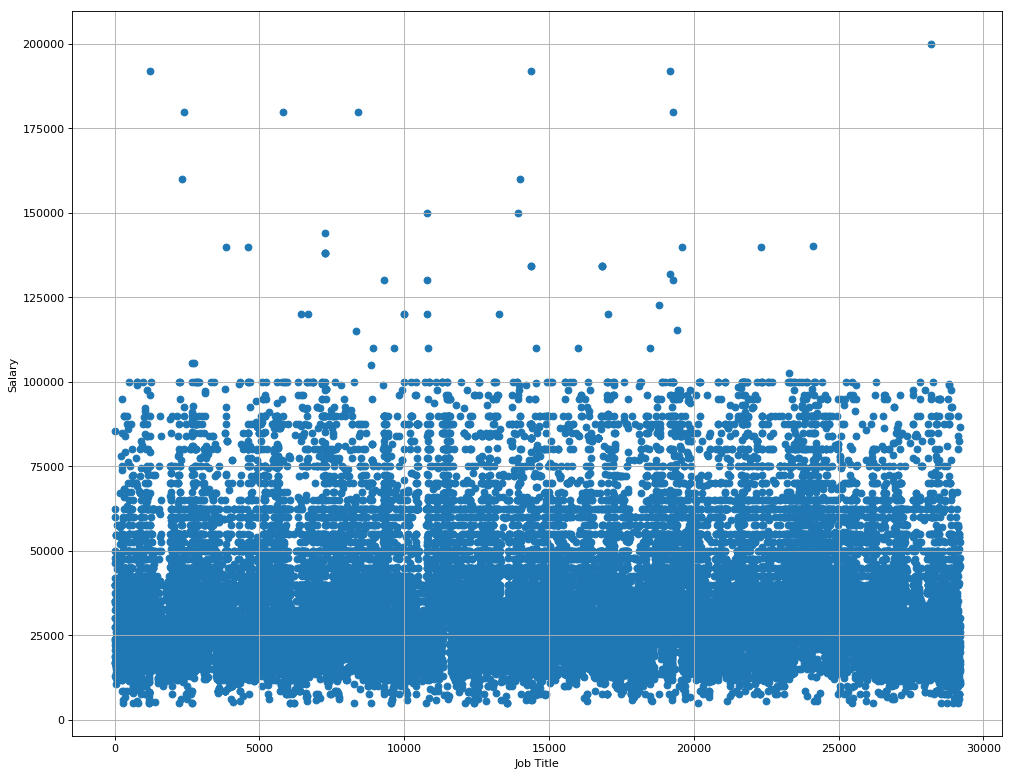

In [12]:
plt.figure(figsize=(15, 12), dpi=80)
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.scatter(titles, location_UK['SalaryNormalized'])
plt.grid(True)
plt.show()

É possivel notar que a maioria dos Titles se encontra entre 5.000,00 a 75.000,00 euros por ano, com alguns poucos felizados com mais de 100.000,00 euros por ano.

Observando a descrição de *UK* temos que a *Business Development Manager* é o *Title* com mais frequência nessa Location.

**Agora fazendo LocationxSalaryNormalized**

Como cada *Location* tem muitos *Titles* e cada *Title* nessa *Location* tem um valor próprio, foi escolhida a seguinte abordagem:
É feita média salarial de cada *Location* para então comparar a média entre as *Location*.

In [13]:
locations = {}
for location_row in df['LocationNormalized']:
    if location_row not in locations.keys():
        location_data = df.loc[df['LocationNormalized'] == location_row]
        locations[location_row] = location_data['SalaryNormalized'].mean()

Resumo do código acima. É criado um dicionário com a média salarial de cada *Location* tendo essa *Location* como chave do dicionário e média como valor.

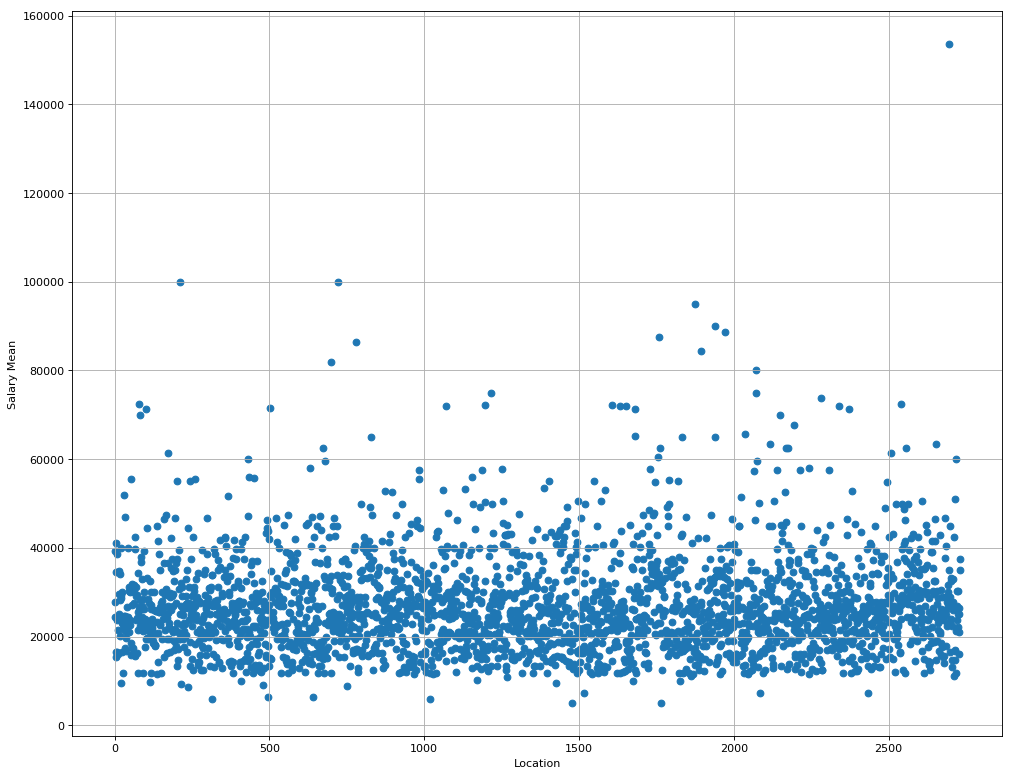

In [14]:
le = LabelEncoder()
location_names = le.fit_transform([name for name in locations.keys()])
locations_mean = [mean for mean in locations.values()]

plt.figure(figsize=(15, 12), dpi=80)
plt.xlabel("Location")
plt.ylabel("Salary Mean")
plt.scatter(location_names, locations_mean)
plt.grid(True)
plt.show()

É possével ver que dentre a média salarial a grande maioria das *Location* tem seu valor entre *10.000,00* e *30.000,00*.

**Verificando quais Location se destacam no grafo**

In [15]:
MIN_CUT_MEAN = 80000

In [16]:
above_cut_mean = []

In [17]:
for location in locations.keys():
    if locations[location] > MIN_CUT_MEAN:
        above_cut_mean.append((location, locations[location]))

In [18]:
above_cut_mean

[('Port Charlotte', 84500.0),
 ('Dungeness', 86400.0),
 ('Quebec', 90000.0),
 ('Reston', 88750.0),
 ('Dallas', 82000.0),
 ('Northam', 87600.0),
 ('Philadelphia', 95000.0),
 ('Worle', 153600.0),
 ('Berwyn', 100000.0),
 ('Denver', 100000.0)]

**Verificando Category**

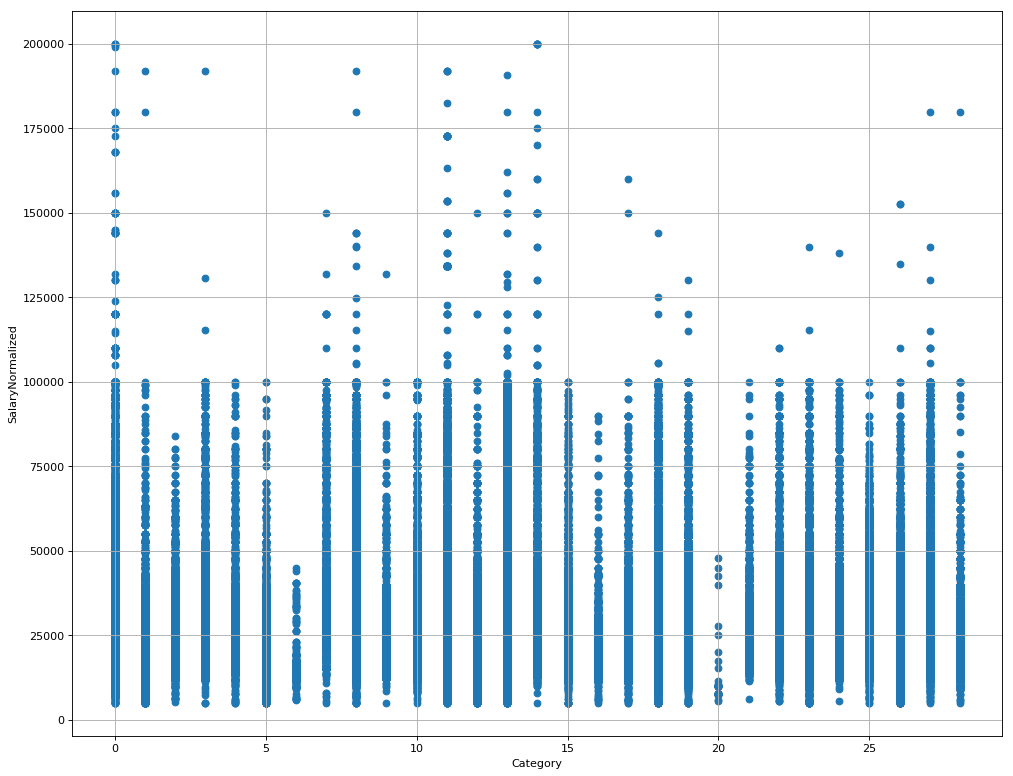

In [21]:
le = LabelEncoder()
categories = le.fit_transform(df2['Category'])

plt.figure(figsize=(15, 12), dpi=80)
plt.xlabel("Category")
plt.ylabel("SalaryNormalized")
plt.scatter(categories, df2['SalaryNormalized'])
plt.grid(True)
plt.show()

**Agora com a média das categorias**

In [24]:
categories = {}
for cat in df2['Category']:
    if cat not in categories.keys():
        category_data = df.loc[df2['Category'] == cat]
        categories[cat] = category_data['SalaryNormalized'].mean()

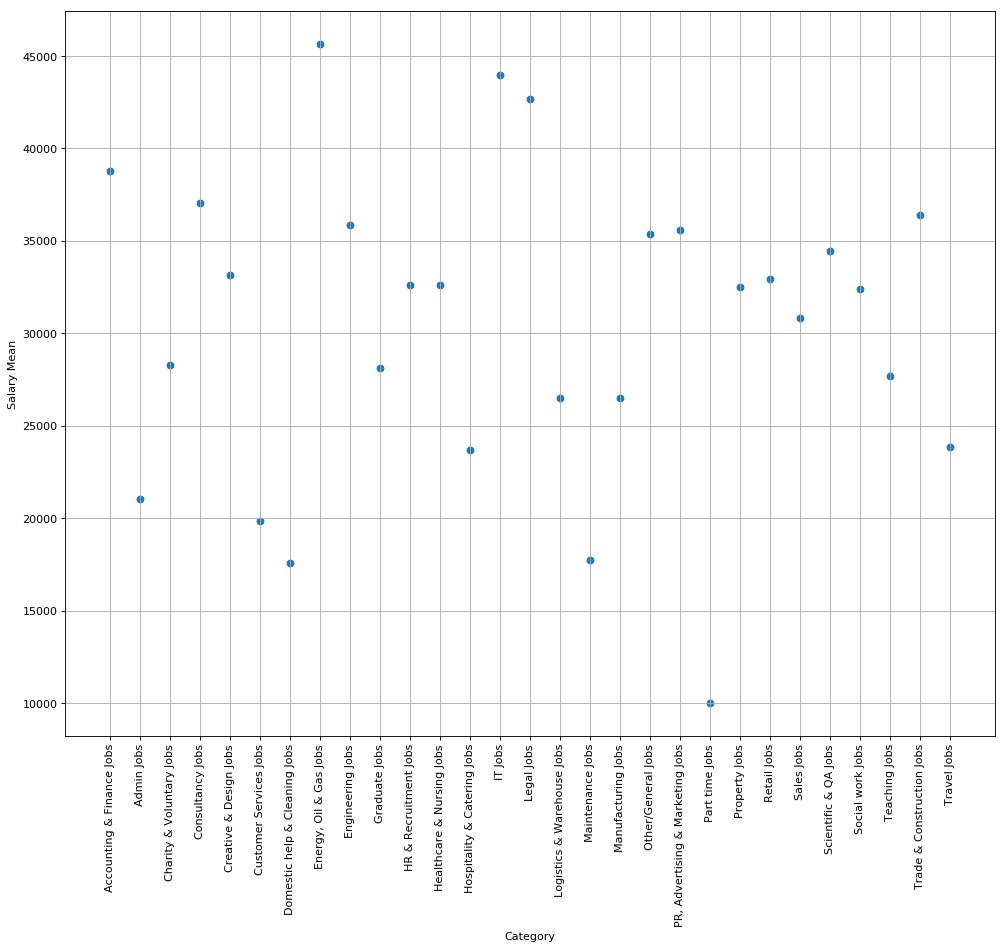

In [28]:
le = LabelEncoder()
categories_names = le.fit_transform(list(categories.keys()))
categories_mean = list(categories.values())

plt.figure(figsize=(15, 12), dpi=80)
plt.xlabel("Category")
plt.ylabel("Salary Mean")
plt.xticks(categories_names, list(categories.keys()), rotation="vertical")
plt.scatter(categories_names, categories_mean)
plt.grid(True)
plt.show()